<a href="https://colab.research.google.com/github/ParasNandwani/MLmodels/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 
The goal is to **Predict SUrvival** of passengers travelling in **TITANIC** using Logistic Regression

## Importing Packages

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import warnings
warnings.simplefilter('ignore')

In [4]:
"""
EDA

Distribution Analysis
Multi Variable Analysis
Correlation Analysis

Pre Modelling
 # Feature Selection
 # Feature Engineering
 # Feature Scalling
 # Feature Balancing

Post Modelling

Model Inference
 
Model Selection

Model interpretation


"""

'\nEDA\n\nDistribution Analysis\nMulti Variable Analysis\nCorrelation Analysis\n\nPre Modelling\n # Feature Selection\n # Feature Engineering\n # Feature Scalling\n # Feature Balancing\n\nPost Modelling\n\nModel Inference\n \nModel Selection\n\nModel interpretation\n\n\n'

## Importing Dataset

In [0]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")

In [51]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# what we have to predict --> Survived Column (Class) --> 0(didn't survive), 1(survived), Categorical Prediction -> Classification 

#Processing The Data
- Dealing with missing values
 - Dropping/Replacing missing enteries of **Embarked**
 - Replacing missing values of Age and Fare with median values
 - Dropping the column 'Cabin' as it has too many null values.
 

In [52]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
----Missing Values-----
-- Drop Cabin(Drop if we have more than 40-60 % Null/Empty values)
-- Impute Age(Numericl Value/Discrete/Numericasl)
   1. -- Statistical Measure :Mean-Median-(We normalize the row)
        --Global Statisctical View(Stats Measure)
   2. -- Give empty values -0 to -99  same standard range values. # Creating new values we are creating bias(we'll consoder this as bias)
   3. -- Model driven prediction for Missing Values
        -- Local Statistical View(Model Driven Approach)
          --Linear Regression
          --KNN
          --Tree Based Methods
    4. --Local Median/Mean
        -- Based on selected columns
           -- Challange is to how many columns to select
        -- Better is to run model and get predictions
-- Impute Embarked(Catagorical/Non Ordinal)
  -- Statistical Measure:Mode High Frequent
  -- Give empty values new category i.e "NA Cat","No Cat"
  -- Model Way: Run classification model to predict value 
  -- Local Mode:-select column to get most frequent
As an eperiment we should pick strategies which one are good

SyntaxError: ignored

In [0]:
titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [54]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
median_age = titanic_data.Age.median()
titanic_data.Age.fillna(median_age,inplace=True)

In [0]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [57]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [0]:
# Feature Engineering:CREATE NEW COLUMN OUT OF EXISTING DATA


## dummy anf catagorical encoding are not feature engineering
## If we have derived value from particular column,make sure to to drop original column

#family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

#accompany
titanic_data['accompany'] = titanic_data['SibSp'] + titanic_data['Parch']


In [59]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
FamilySize     891 non-null int64
accompany      891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [0]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1) 

In [61]:
titanic_data[titanic_data.Age<15].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,accompany,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,4,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,1,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,3,2,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,1,0,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,6,5,child


In [62]:
titanic_data[titanic_data.Age>15].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,accompany,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,1,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,1,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,male


### Dropping columns

In [63]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch', 'PassengerId'], axis = 1)
titanic.head()

,Survived,Pclass,Age,Fare,Embarked,FamilySize,accompany,GenderClass
0,0,3,22.0,7.2500,S,2,1,male
1,1,1,38.0,71.2833,C,2,1,female
2,1,3,26.0,7.9250,S,1,0,female
3,1,1,35.0,53.1000,S,2,1,female
4,0,3,35.0,8.0500,S,1,0,male


## Goal is to convert evrything into numerical continous

## don not do getDummeis() on  numerical ordinal discrete

In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null object
FamilySize     891 non-null int64
accompany      891 non-null int64
GenderClass    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [0]:
titanic = pd.get_dummies(titanic, columns=['GenderClass','Embarked'])

In [66]:
titanic.head(3)

,Survived,Pclass,Age,Fare,FamilySize,accompany,GenderClass_child,GenderClass_female,GenderClass_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,0,1,0,0,1
1,1,1,38.0,71.2833,2,1,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,1,0,0,0,1


Drawing **PairPlot** to know the joint relationship 

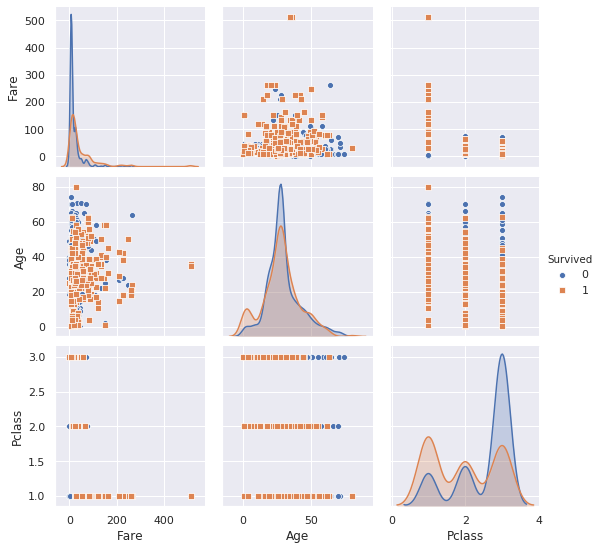

In [67]:
sns.pairplot(titanic_data[['Fare','Age','Pclass','Survived']],vars=['Fare','Age','Pclass'],
             hue='Survived',dropna=True,markers=['o','s'])
plt.show()

# Observing the diagonal elements
 - More People of PClass 1 survived than died
 - More People PClass 3 died than survived 
 - Most people of age group 20-40 died than survived
 - Most of the people paying lass fare died

# Establishing coorelation between all the features using HeatMap


Text(0.5, 1, 'Correlation between features')

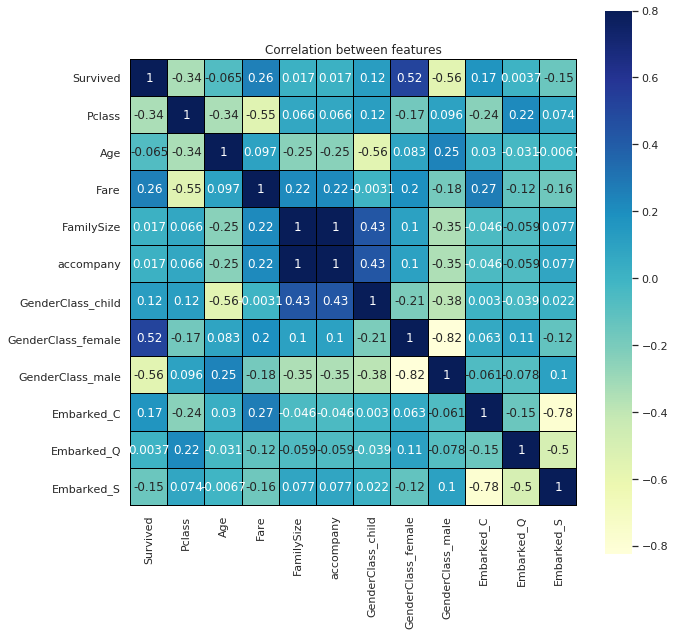

In [68]:
corr=titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidths=0.1,square=True,annot=True,cmap='YlGnBu',linecolor='black')
plt.title('Correlation between features')

- Age and Pclass are negatively correlated with Survived
- FamilySize is made from Parch,Sibsb only therefor high correlation


# Logistic Regression

Logistic regression is a technique used for solving the **classification problem** and classification is nothing but a problem of **identifing** to which of a set of categories a new observation belongs,on the basis of training of data containing observations whose categorical membership is known.      
For example to predict:     
Whether an email,is spam (1) or not(0) or

# Mathematics behind Logistic regression
The odds for an Event is the (probability of any event occurring) 


# Applications of Logistic Regression
Logistic Regression  was used in **biological sciences** in early twentieth century.It was then used in many social sciece applications.
- The trauma and injury severity score ,which uis widely used to **predict mortality in injured patients**  
- Many other medical scales used to **access severity** of a patient have been devlopeed using logistic regession .
- Logistic regression may be used to **Predict the risk of developing a given disease**(e.g. diabetes coronary heart disease), based on observed characteristics of the patient(ages,sex,body mass index).   
Now a days,Logistic Regression have the following applications.
1. Image segmentation
2. Geographic Image Processing
3. Handwritting recognition
4. Detection of myoccardinal infraction
5. Predict whether a person is depressed or not based on bag of word from corpus

The reason why logistic regression is widely used despite of the art of deep neural network is that logistic regression is very efficient and does not require too much computational resources which makes it affordable to run on production

# Preparing X and Y using pandas

In [0]:
X=titanic.loc[:,titanic.columns!='Survived']

In [0]:
Y=titanic['Survived']

In [0]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [72]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 11)
(712,)
(179, 11)
(179,)


In [73]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'accompany', 'GenderClass_child',
       'GenderClass_female', 'GenderClass_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [74]:
X_train.head()

,Pclass,Age,Fare,FamilySize,accompany,GenderClass_child,GenderClass_female,GenderClass_male,Embarked_C,Embarked_Q,Embarked_S
301,3,28.0,23.2500,3,2,0,0,1,0,1,0
309,1,30.0,56.9292,1,0,0,1,0,1,0,0
516,2,34.0,10.5000,1,0,0,1,0,0,0,1
120,2,21.0,73.5000,3,2,0,0,1,0,0,1
570,2,62.0,10.5000,1,0,0,0,1,0,0,1


# Logistic Regression in scikit-learn
To apply any machine learning algorithm on our dataset ,basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training set
3. Prediction on the test result
4. Calculating the accuracy of the model



# Base Model --> No Parameter Model
# Baseline Model --> Simplistic model in overall model choiced ,which acts as base line,which means we should not get results lesser than this baseline model.Baseline model can be base or parameterized model.In regression ,usually we take LinearReg as baseline.In classification we take LogReg as baseline.


In [82]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
from sklearn.model_selection import GridSearchCV
grid={
      "C":np.logspace(-3,3,7), 
      "penalty":["l1","l2"], 
      "tol":[0.01,0.001,0.0001]
     }# l1 lasso l2 ridge
logreg=LogisticRegression()
log_regCV=GridSearchCV(logreg,grid,cv=10)
log_regCV.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",log_regCV.best_params_)
print("accuracy :",log_regCV.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2', 'tol': 0.01}
accuracy : 0.8301838810641626


In [0]:
Y_pred_train=logreg.predict(X_train)

In [0]:
Y_pred_test=logreg.predict(X_test)

In [0]:
Y_pred_grid=log_regCV.predict(X_test)

# Model Evaluation
**Error** is the deviation of the values predicted by the model with the true values.We will use **accuracy_score and _confusion_matrix** for evaluation.

In [88]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(Y_test,Y_pred_test))

Accuracy score for test data is: 0.7932960893854749


In [89]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(Y_test,Y_pred_grid))

Accuracy score for test data is: 0.7877094972067039


In [0]:
# Accuracy --> Out of all predictions,how many are correct
# TotalCorrect/Total Prediction


# Model Evaluation using confusion matrix
A **confusion metrix** is a **summary** of prediction  results on classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class.

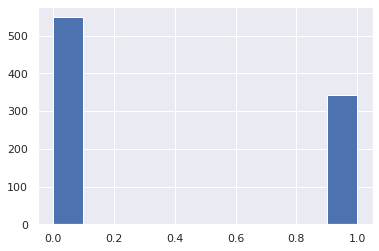

In [91]:
titanic['Survived'].hist()

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix=pd.DataFrame(confusion_matrix(Y_test,Y_pred_test))
confusion_matrix

,0,1
0,93,13
1,24,49


In [93]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  93                  13
Actual Survived              24                  49


This means **93+49=142 correct predictions** and **25+13=38** false predictions

**Adjusting Threshold** 
- We have used .predict method for classification .The method takes 0.5 as the default threshold for prediction
- Now,we are going to see the impact of changing threshold on the accuracy of our logistic regression model.
- For this we are going to use **.predict_proba** method instead of using .predict method
